In [9]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Using the same dataset and conversion method from before
df = pd.read_csv('/kaggle/input/ckdataset/ckextended.csv')
df['image'] = df['pixels'].apply(pixels_to_image)



In [10]:
# Flatten images for SVM input
df['flattened_image'] = df['image'].apply(lambda x: x.flatten())

# Select training data
train_data = df[df['Usage'] == 'Training']



In [11]:
# Extract features and targets
X = np.stack(train_data['flattened_image'].values)
y = train_data['emotion'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and (if necessary) validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:

# Initialize and train SVM
svm_model = SVC(kernel='linear', C=1, probability=True)  # Use 'rbf' for radial basis function kernel if suitable
svm_model.fit(X_train, y_train)


SVC(C=1, kernel='linear', probability=True)

In [13]:

# Evaluate the model
y_pred = svm_model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Optionally visualize confusion matrix or other metrics

# If desired, save the SVM model using joblib
# from joblib import dump
# dump(svm_model, 'svm_emotion_model.joblib')

Accuracy: 0.8979591836734694
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.86      0.67      0.75         9
           2       1.00      0.25      0.40         4
           3       1.00      1.00      1.00         5
           4       0.00      0.00      0.00         4
           5       1.00      0.88      0.93        16
           6       0.89      1.00      0.94       100
           7       1.00      0.33      0.50         3

    accuracy                           0.90       147
   macro avg       0.81      0.62      0.66       147
weighted avg       0.88      0.90      0.88       147



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


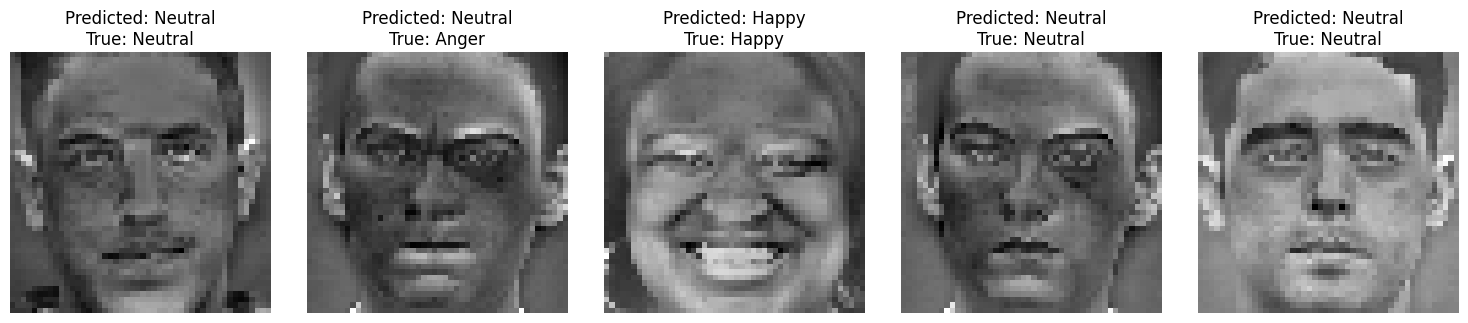

In [19]:
import matplotlib.pyplot as plt

# Define a mapping from numeric labels to emotion names
emotion_mapping = {
    0: 'Anger',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral',
    7: 'Contempt'
}

# Select 5 random images from the validation set
random_indices = np.random.choice(len(X_val), size=5, replace=False)
random_images = X_val[random_indices]
random_labels = y_val[random_indices]

# Predict emotions for the selected images
predictions = svm_model.predict(random_images)

# Plot the images and their predicted values
plt.figure(figsize=(15, 6))

for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i].reshape(48, 48), cmap='gray')  # Reshape back to original image size
    # Map the numeric predictions and labels to their corresponding emotion names
    predicted_emotion = emotion_mapping[predictions[i]]
    true_emotion = emotion_mapping[random_labels[i]]
    plt.title(f"Predicted: {predicted_emotion}\nTrue: {true_emotion}")
    plt.axis('off')

plt.tight_layout()
plt.show()
